# HR Analytics: Job Change of Data Scientists
data :https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists?select=aug_train.csv


A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

The whole data divided to train and test . Target isn't included in test but the test target values data file is in hands for related tasks. A sample submission correspond to enrollee_id of test set provided too with columns : enrollee _id , target

# Inspiration
--> Predict the probability of a candidate will work for the company
--> Interpret model(s) such a way that illustrate which features affect candidate decision


In [4]:
import pandas as pd
import numpy as np
import seaborn as sb
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder,PowerTransformer,MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import auc, accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE,ADASYN, SVMSMOTE
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn import metrics
from sklearn.compose import make_column_transformer
#import category_encoders as ce
from collections import Counter
import warnings



In [5]:
test = pd.read_csv("aug_test.csv")
train  = pd.read_csv("aug_train.csv")



In [6]:
#train.drop(['enrollee_id'],axis=1,inplace=True)
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [8]:
print(train['relevent_experience'].unique())
print('*'*35)
print(train['enrolled_university'].unique())
print('*'*35)
print(train['education_level'].unique())
print('*'*35)
print(train['major_discipline'].unique())
print('*'*35)
print(train['experience'].unique())
print('*'*35)
print(train['company_size'].unique())
print('*'*35)
print(train['company_type'].unique())
print('*'*35)
print(train['last_new_job'].unique())
print('*'*35)

['Has relevent experience' 'No relevent experience']
***********************************
['no_enrollment' 'Full time course' nan 'Part time course']
***********************************
['Graduate' 'Masters' 'High School' nan 'Phd' 'Primary School']
***********************************
['STEM' 'Business Degree' nan 'Arts' 'Humanities' 'No Major' 'Other']
***********************************
['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18'
 '19' '12' '3' '6' '9' '8' '20' nan]
***********************************
[nan '50-99' '<10' '10000+' '5000-9999' '1000-4999' '10/49' '100-500'
 '500-999']
***********************************
[nan 'Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Other'
 'Public Sector' 'NGO']
***********************************
['1' '>4' 'never' '4' '3' '2' nan]
***********************************


In [9]:
def f(data):
    for i in range(len(data.columns)): 
          x = pd.DataFrame(data[data.columns[i]].value_counts())
          for k in x:
             z = x[k]/19158
          
          y= pd.concat([x,z],axis =1)
          print(y)
          print('*'*34)
            
f(data=train)

       enrollee_id  enrollee_id
8949             1     0.000052
10660            1     0.000052
30726            1     0.000052
18507            1     0.000052
31273            1     0.000052
...            ...          ...
11547            1     0.000052
32067            1     0.000052
14356            1     0.000052
18051            1     0.000052
23834            1     0.000052

[19158 rows x 2 columns]
**********************************
          city      city
city_103  4355  0.227320
city_21   2702  0.141038
city_16   1533  0.080019
city_114  1336  0.069736
city_160   845  0.044107
...        ...       ...
city_129     3  0.000157
city_111     3  0.000157
city_121     3  0.000157
city_140     1  0.000052
city_171     1  0.000052

[123 rows x 2 columns]
**********************************
       city_development_index  city_development_index
0.920                    5200                0.271427
0.624                    2702                0.141038
0.910                    1533     

In [10]:
train['company_size'] == train['company_size'].replace('10/49','10-49',inplace=True)
train['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
10-49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [11]:
pd.DataFrame(train.groupby(["target"]).count())

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
target,,,,,,,,,,,,,
0.0,14381,14381,14381,11262,14381,14118,14025,12117,14339,10853,10625,14112,14381
1.0,4777,4777,4777,3388,4777,4654,4673,4228,4754,2367,2393,4623,4777


In [12]:
x= train['target']==1
f(data=train[x])

       enrollee_id  enrollee_id
8949             1     0.000052
11415            1     0.000052
26988            1     0.000052
23376            1     0.000052
28026            1     0.000052
...            ...          ...
10118            1     0.000052
31365            1     0.000052
20574            1     0.000052
3417             1     0.000052
31398            1     0.000052

[4777 rows x 2 columns]
**********************************
          city      city
city_21   1597  0.083359
city_103   928  0.048439
city_160   199  0.010387
city_16    179  0.009343
city_11    147  0.007673
...        ...       ...
city_121     1  0.000052
city_166     1  0.000052
city_171     1  0.000052
city_18      1  0.000052
city_81      1  0.000052

[115 rows x 2 columns]
**********************************
       city_development_index  city_development_index
0.624                    1597                0.083359
0.920                    1127                0.058827
0.698                     194      

In [13]:
def v(data):
    for i in range(len(data.columns)): 
          x1= train['target']==1
          Z = train[x1]        
          x = data[data.columns[i]].value_counts()
          b = Z[data.columns[i]].value_counts()
          t = b/x
          
          
          
          y= pd.concat([x,b,t],axis =1)
          print(y)
          print('*'*25)
          print('*'*34)
            
v(data=train)


       enrollee_id  enrollee_id  enrollee_id
1                1          NaN          NaN
2                1          1.0          1.0
4                1          NaN          NaN
5                1          NaN          NaN
7                1          NaN          NaN
...            ...          ...          ...
33375            1          NaN          NaN
33376            1          NaN          NaN
33377            1          NaN          NaN
33379            1          NaN          NaN
33380            1          NaN          NaN

[19158 rows x 3 columns]
*************************
**********************************
          city    city      city
city_103  4355   928.0  0.213088
city_21   2702  1597.0  0.591044
city_16   1533   179.0  0.116765
city_114  1336   133.0  0.099551
city_160   845   199.0  0.235503
...        ...     ...       ...
city_129     3     NaN       NaN
city_111     3     NaN       NaN
city_121     3     1.0  0.333333
city_140     1     NaN       NaN
city_171  

In [16]:
print(train.isnull().sum())

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


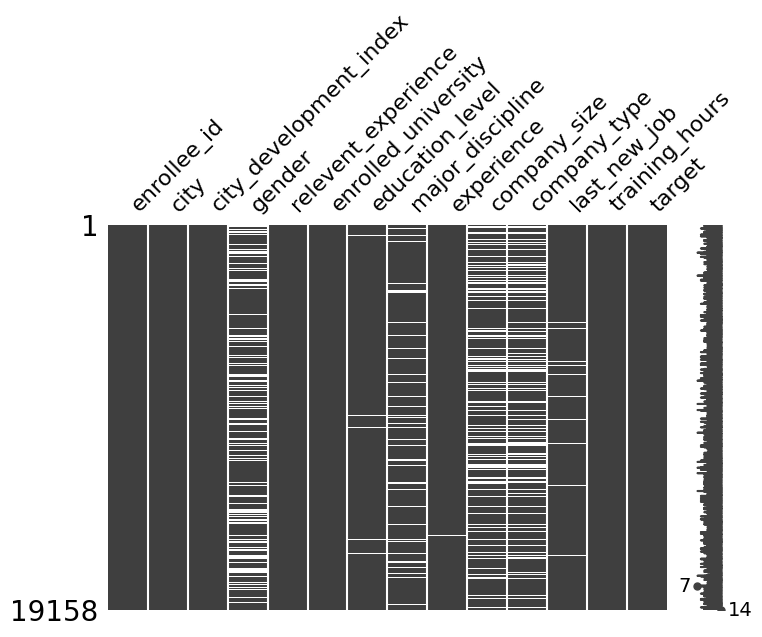

In [17]:
import missingno as msno 

msno.matrix(train,figsize=(8,5))
plt.show()

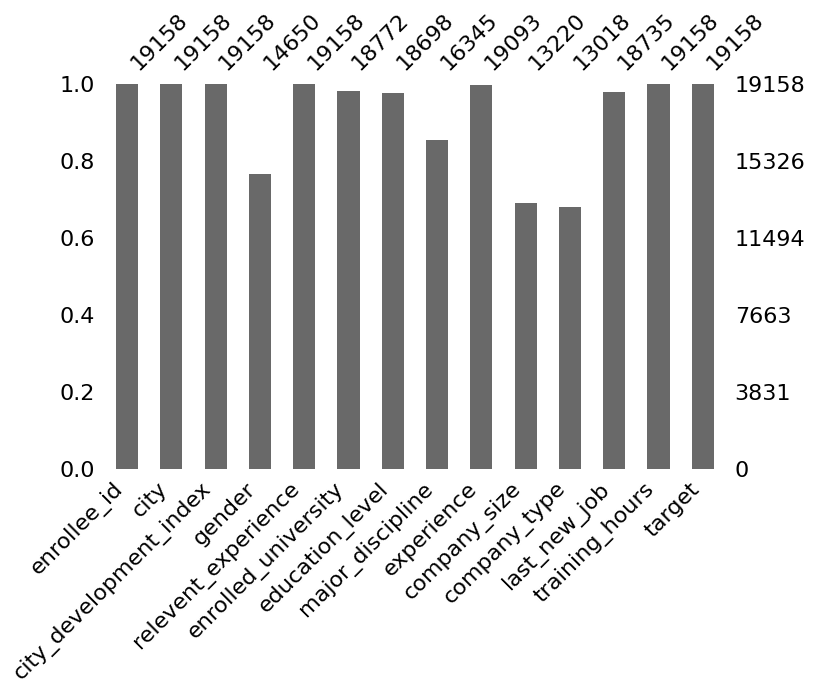

In [18]:
msno.bar(train,figsize=(8,5))
plt.show()

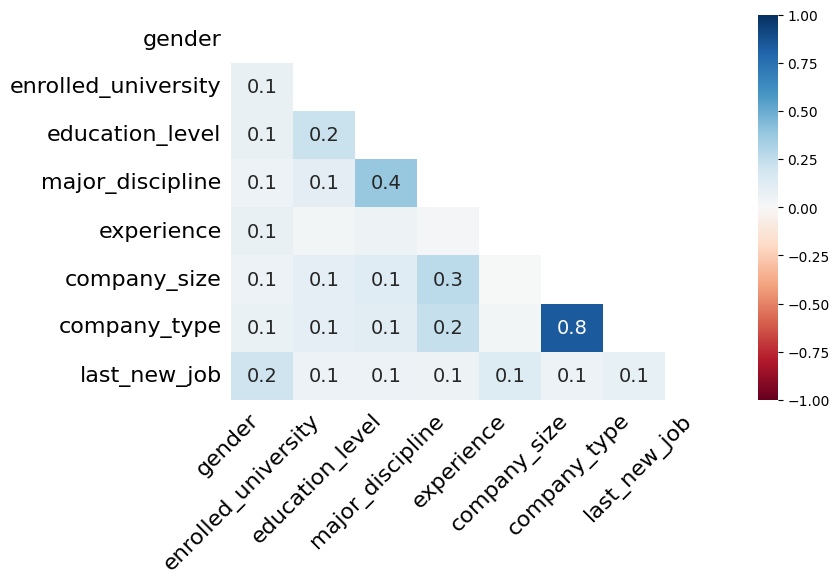

In [19]:
msno.heatmap(train,figsize=(8,5))
plt.show()

In [20]:
c= train[(train['relevent_experience']=='No relevent experience') & (train['last_new_job']=='never')]
print(c.isnull().sum())
l = train[(train['education_level']=='High School') ]
print("x"*35)
print(l.isnull().sum())
h = train[(train['relevent_experience']=='No relevent experience') ]
print("x"*35)
print(h.isnull().sum())
p = train[train['education_level']=='Primary School']
print("x"*35)
print(p.isnull().sum())

print("*"*35)
print(l.isnull().sum()+p.isnull().sum())



enrollee_id                  0
city                         0
city_development_index       0
gender                     566
relevent_experience          0
enrolled_university        108
education_level            157
major_discipline           979
experience                   7
company_size              1581
company_type              1374
last_new_job                 0
training_hours               0
target                       0
dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
enrollee_id                  0
city                         0
city_development_index       0
gender                     522
relevent_experience          0
enrolled_university         47
education_level              0
major_discipline          2017
experience                   4
company_size              1163
company_type              1118
last_new_job                64
training_hours               0
target                       0
dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
enrollee_id                  0
cit

In [21]:
r = train[(train['relevent_experience']=='No relevent experience') ]
e = train[train['experience']=='<1']
print(r.isnull().sum()+e.isnull().sum())



enrollee_id                  0
city                         0
city_development_index       0
gender                    1893
relevent_experience          0
enrolled_university        215
education_level            276
major_discipline          1898
experience                  21
company_size              3648
company_type              3454
last_new_job               238
training_hours               0
target                       0
dtype: int64


In [22]:
r = train[(train['relevent_experience']=='No relevent experience') ]
e = train[train['experience']=='<1']
print(r.isnull().sum()+e.isnull().sum())



enrollee_id                  0
city                         0
city_development_index       0
gender                    1893
relevent_experience          0
enrolled_university        215
education_level            276
major_discipline          1898
experience                  21
company_size              3648
company_type              3454
last_new_job               238
training_hours               0
target                       0
dtype: int64


well I can  see that people have no relevant experience and never change their job, 949 don't say what their major 
and people who went to high school and primary school don't say anything about their major 
I believed that maybe these people who don't go to university are self-learning but after sow the data I can tell they don't
that solves the problem 
null  fill by --> no major

3000 people with no relevant experience decided to not Manchin ther company size and company name 
1200 people go to primary school and the high school says nothing about the company name size  
I will assume they never work before 

null  fill by --> no for both 
and last new job with never








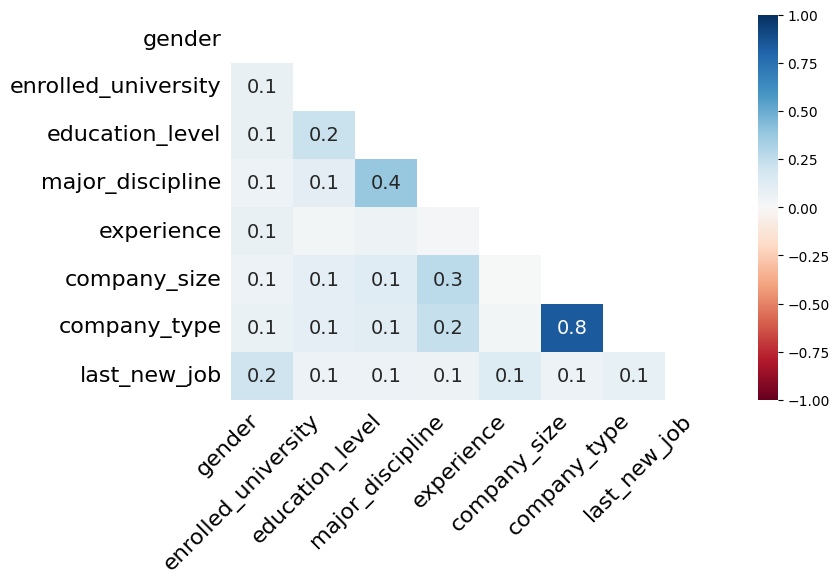

In [23]:
msno.heatmap(train,figsize=(8,5))
plt.show()

I was thinking that whom dont say a thing about their education level, not mostly  don't have a major but this person won't have a high education and don't have major ether 
fill with high school and no major 




In [24]:
r = train[(train['city']=='city_103') ]
e = train[train['city_development_index']==0.920]
print(r.isnull().sum()+e.isnull().sum())
# if we get no more for this fillter that peter no i am more wary apout the company size and company type



enrollee_id                  0
city                         0
city_development_index       0
gender                    1706
relevent_experience          0
enrolled_university         85
education_level            164
major_discipline           907
experience                  36
company_size              2804
company_type              2786
last_new_job               138
training_hours               0
target                       0
dtype: int64


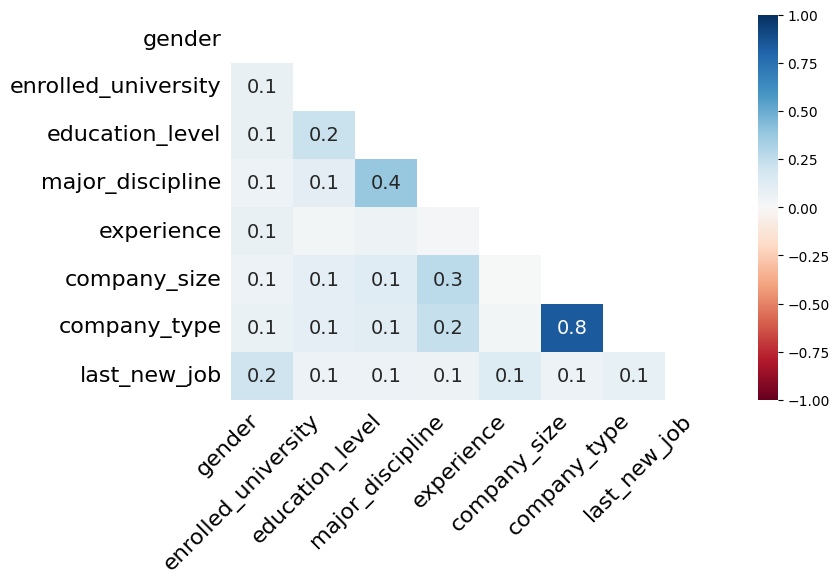

In [25]:
msno.heatmap(train,figsize=(8,5))
plt.show()

and this I can't go further since more editing and exploring for the data will change the data so much and evintchaly make it worst 



well for the gender I decided to fill null by a female 60 % of the time 30% man and 10% other


<AxesSubplot: >

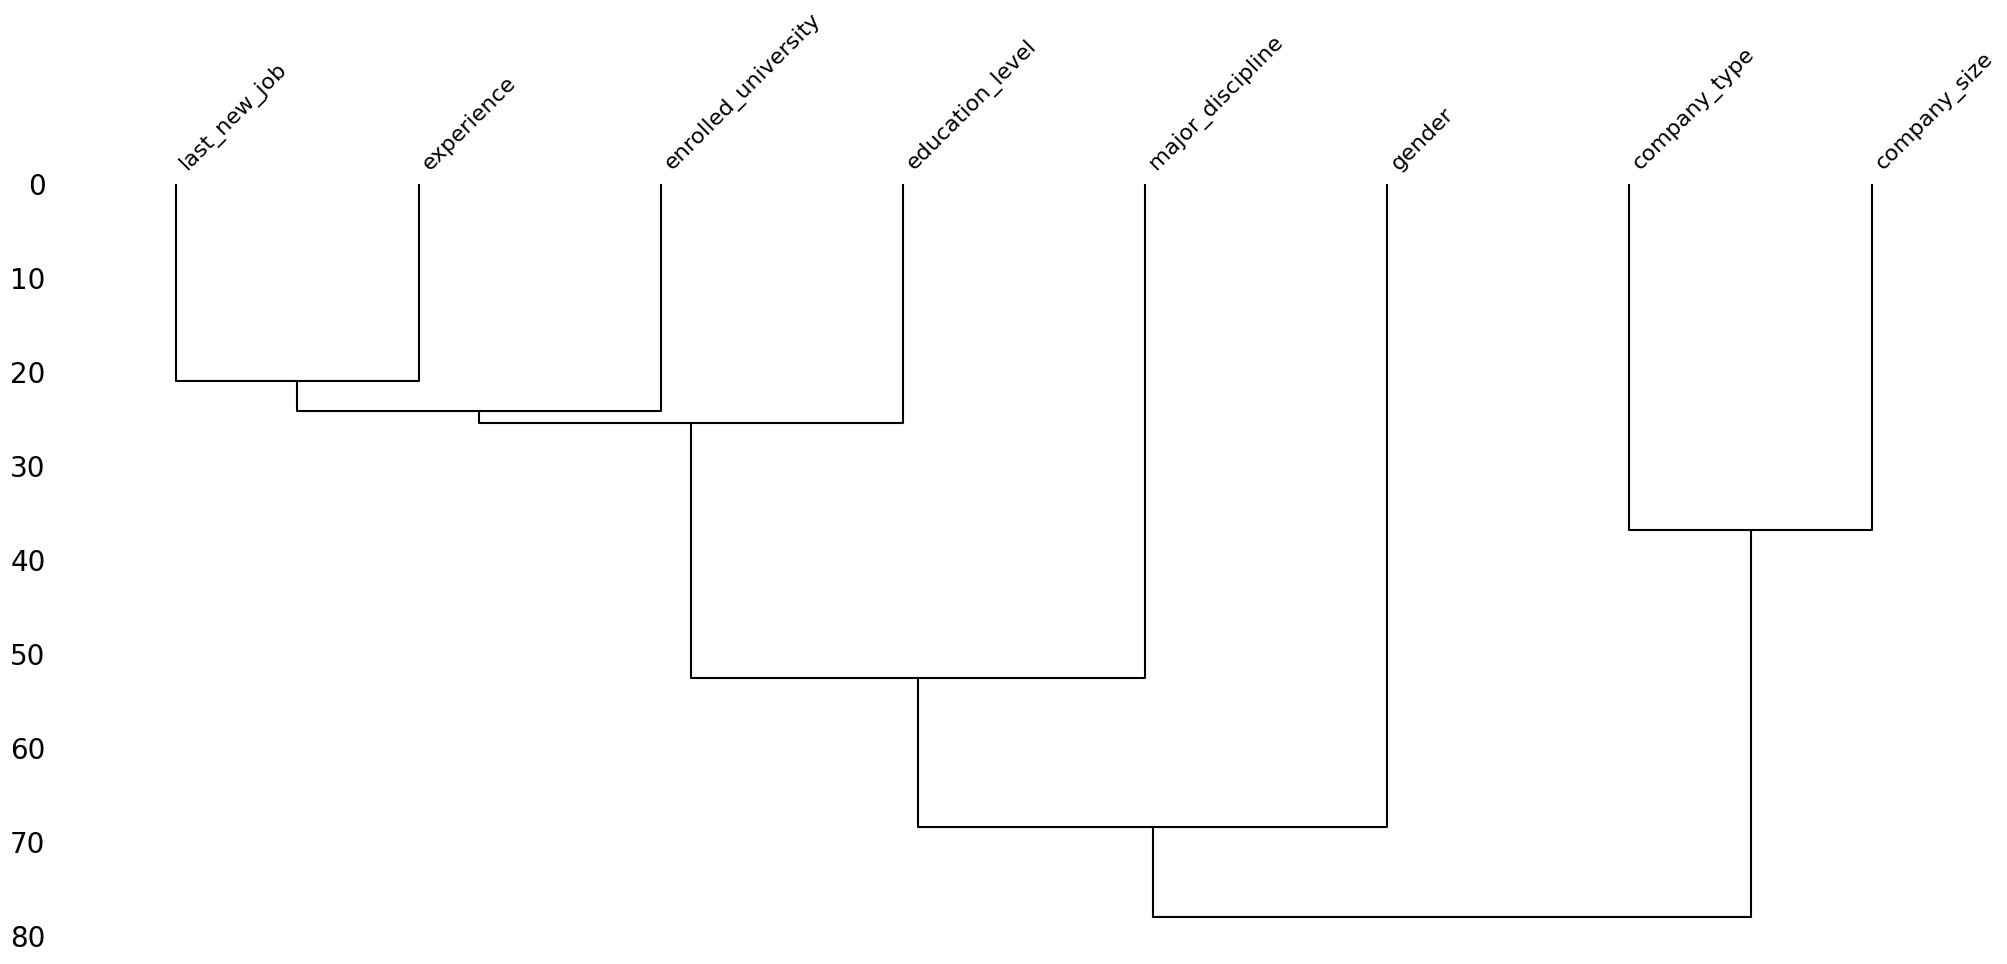

In [26]:

missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
msno.dendrogram(train[missing_columns])


gender is the most missing data and I can not find why people diced to hide their gender that just weird and maybe this data is data came from more than just one source any way there is no chance to predict them ---->fill null by a female by 60 % of the time 30% man and 10% other

<AxesSubplot: >

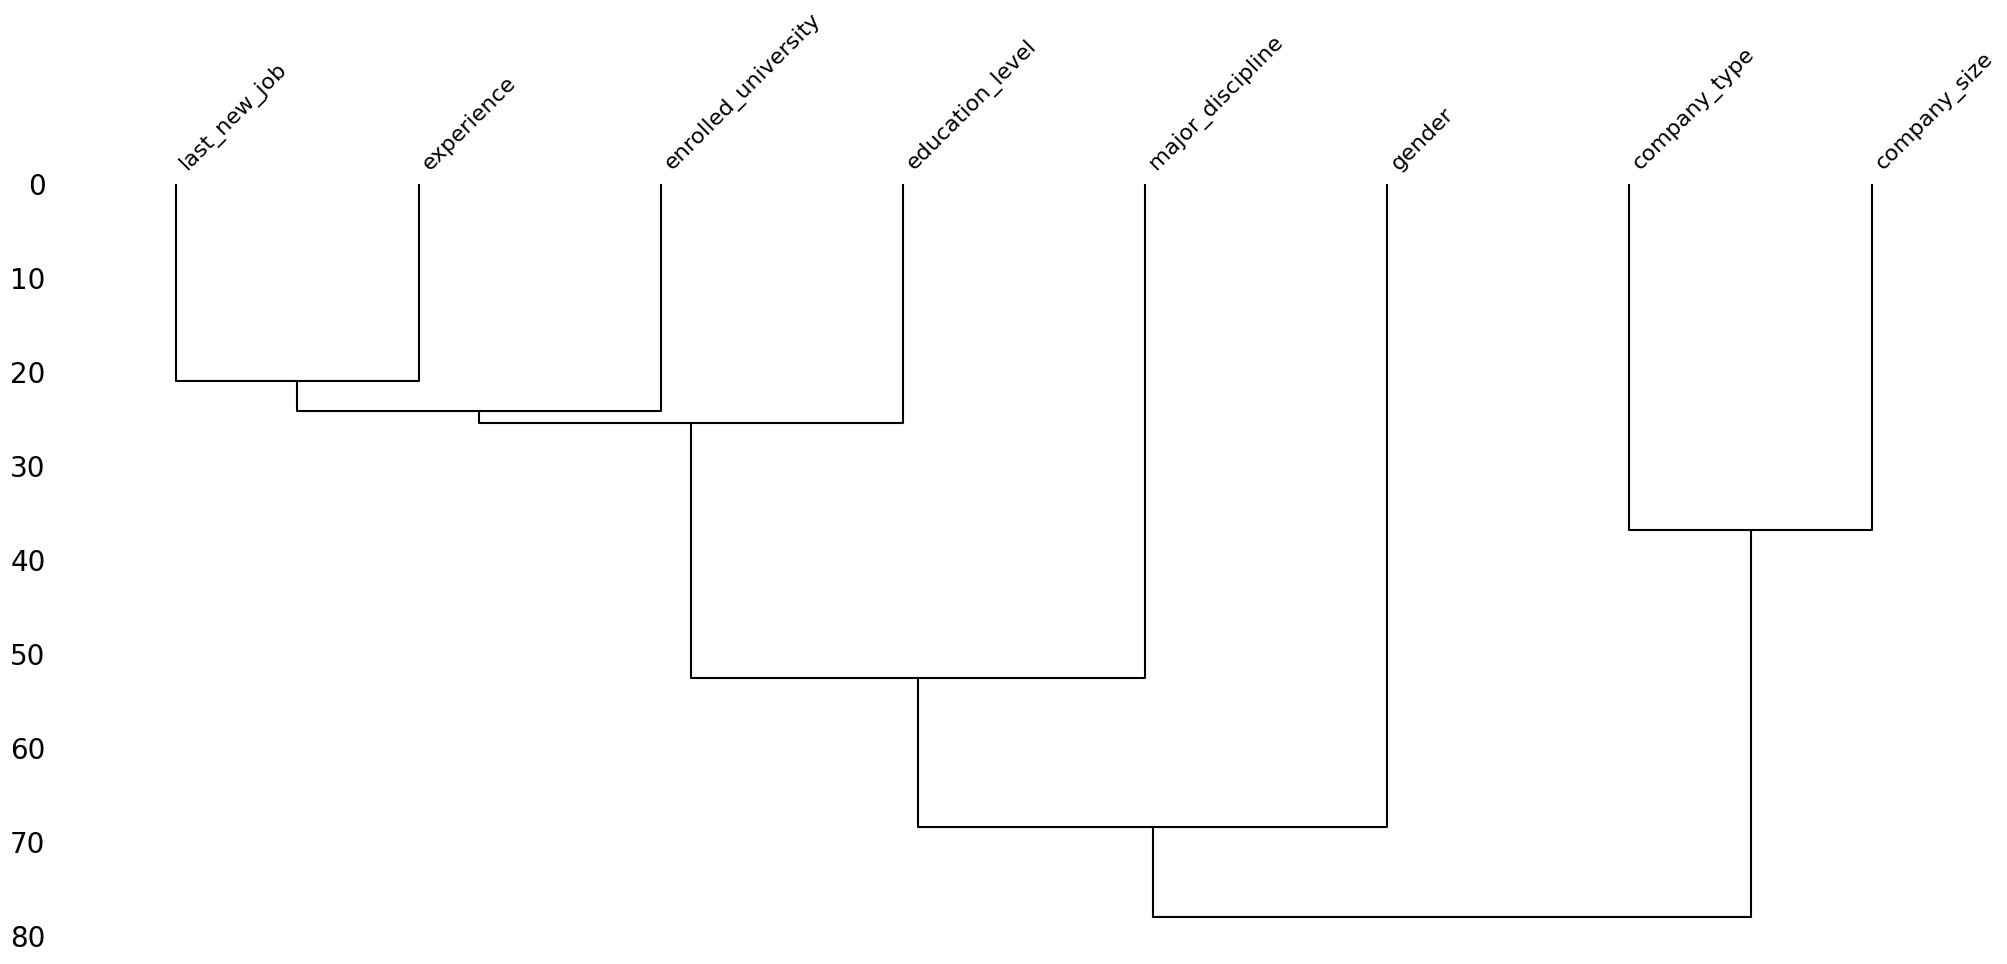

In [27]:
df = train.copy()
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
msno.dendrogram(df[missing_columns])


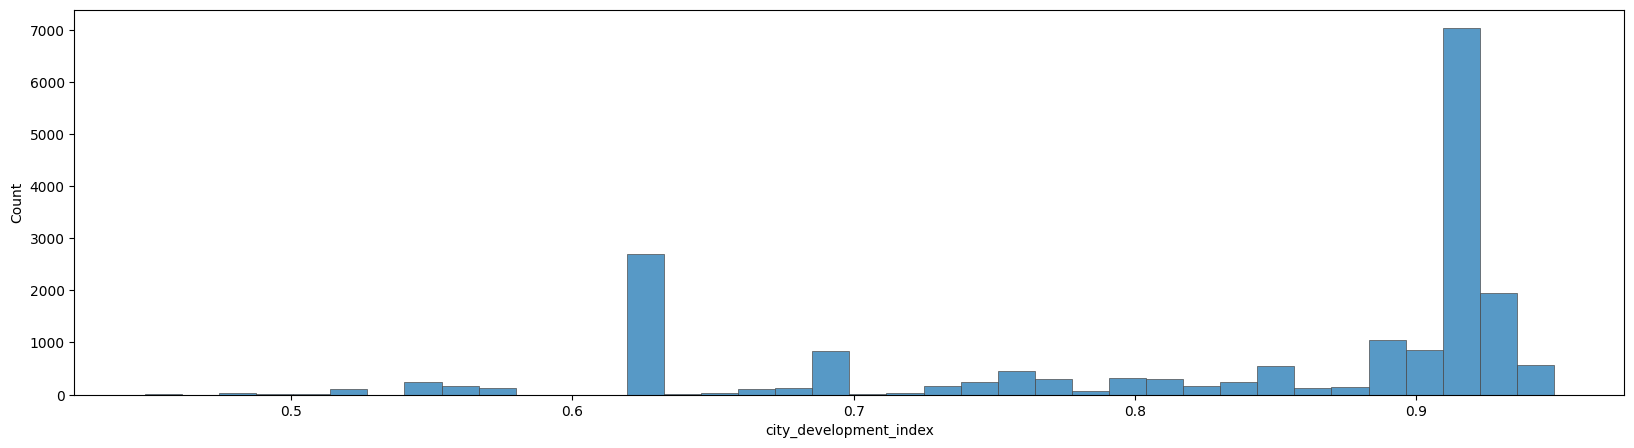

In [28]:
figure =plt.figure(figsize=(20,5))
sns.histplot(
    df,
    x="city_development_index",
    multiple ="stack",
    edgecolor =".3",
    linewidth=.5,
    log_scale =False,
)
plt.show()

In [29]:
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
missing_columns
cat_missing_cols = [col for col in missing_columns if df[col].dtype == 'object']
cat_missing_cols


['gender',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [30]:
from sklearn.tree import DecisionTreeRegressor

dr = DecisionTreeRegressor()


In [31]:
df_temp = df.copy()


In [32]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

cat_cols = [col for col in df.columns if df[col].dtype == 'object']

for col in cat_cols:
    df_temp[col] = lb.fit_transform(df_temp[col])

In [33]:
df_temp

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,5,0.920,1,0,2,0,5,21,8,6,0,36,1.0
1,29725,77,0.776,1,1,2,0,5,6,4,5,4,47,0.0
2,11561,64,0.624,3,1,0,0,5,15,8,6,5,83,0.0
3,33241,14,0.789,3,1,3,0,1,20,8,5,5,52,1.0
4,666,50,0.767,1,0,2,2,5,21,4,1,3,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,55,0.878,1,1,2,0,2,5,8,6,0,42,1.0
19154,31398,5,0.920,1,0,2,0,5,5,8,6,3,52,1.0
19155,24576,5,0.920,1,0,2,0,5,21,4,5,3,44,0.0
19156,5756,94,0.802,1,0,2,1,6,20,5,5,1,97,0.0


In [34]:
from sklearn.impute import KNNImputer

def knn_imputation(df):
    missing_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
    non_missing_cols = [col for col in df.columns if df[col].isnull().sum() == 0]

    for col in missing_cols:

        # Defining a new bagging model for each attribute  
        model = KNNImputer(n_neighbors = 3)

        col_missing = df[df[col].isnull()]
        temp = df.drop(df[df[col].isnull()].index, axis = 0)

        # print(temp.columns)
        # X = temp.drop(col, axis = 1)
        X = temp.loc[:, non_missing_cols]
        y = temp[col]

        model.fit(X, y)

        y_pred = model.predict(col_missing[non_missing_cols])
        # col_missing[col] = y_pred

        df.loc[col_missing.index, col] = y_pred
        
    return df
    

In [35]:
dfknn = knn_imputation(df_temp)


In [36]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import KNNImputer

def tree_imputation(df):
    missing_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
    non_missing_cols = [col for col in df.columns if df[col].isnull().sum() == 0]

    for col in missing_cols:

        # Defining a new bagging model for each attribute  
        model = BaggingRegressor(DecisionTreeRegressor(), n_estimators = 40, max_samples = 1.0, max_features = 1.0, bootstrap = False, n_jobs = -1)

        col_missing = df[df[col].isnull()]
        temp = df.drop(df[df[col].isnull()].index, axis = 0)

        # print(temp.columns)
        # X = temp.drop(col, axis = 1)
        X = temp.loc[:, non_missing_cols]
        y = temp[col]

        model.fit(X, y)

        y_pred = model.predict(col_missing[non_missing_cols])
        # col_missing[col] = y_pred

        df.loc[col_missing.index, col] = y_pred
        
    return df
    

In [37]:
df_new = tree_imputation(df_temp)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  int32  
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  int32  
 4   relevent_experience     19158 non-null  int32  
 5   enrolled_university     19158 non-null  int32  
 6   education_level         19158 non-null  int32  
 7   major_discipline        19158 non-null  int32  
 8   experience              19158 non-null  int32  
 9   company_size            19158 non-null  int32  
 10  company_type            19158 non-null  int32  
 11  last_new_job            19158 non-null  int32  
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int32(10), int64(2)
mem

In [38]:
# Normality
from scipy.stats import shapiro

for i in df_new.columns :
    print("---"*30)
    print(i)
    print("%.4f-%.4f" %shapiro(df_new[i]))

------------------------------------------------------------------------------------------
enrollee_id
0.9554-0.0000
------------------------------------------------------------------------------------------
city
0.8959-0.0000
------------------------------------------------------------------------------------------
city_development_index
0.7638-0.0000
------------------------------------------------------------------------------------------
gender
0.6644-0.0000
------------------------------------------------------------------------------------------
relevent_experience
0.5621-0.0000
------------------------------------------------------------------------------------------
enrolled_university
0.6207-0.0000
------------------------------------------------------------------------------------------
education_level
0.6961-0.0000
------------------------------------------------------------------------------------------
major_discipline
0.5396-0.0000
----------------------------------------

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [39]:
shapiro(df_new)


ShapiroResult(statistic=0.25658130645751953, pvalue=0.0)

In [40]:
data = df_new.copy()

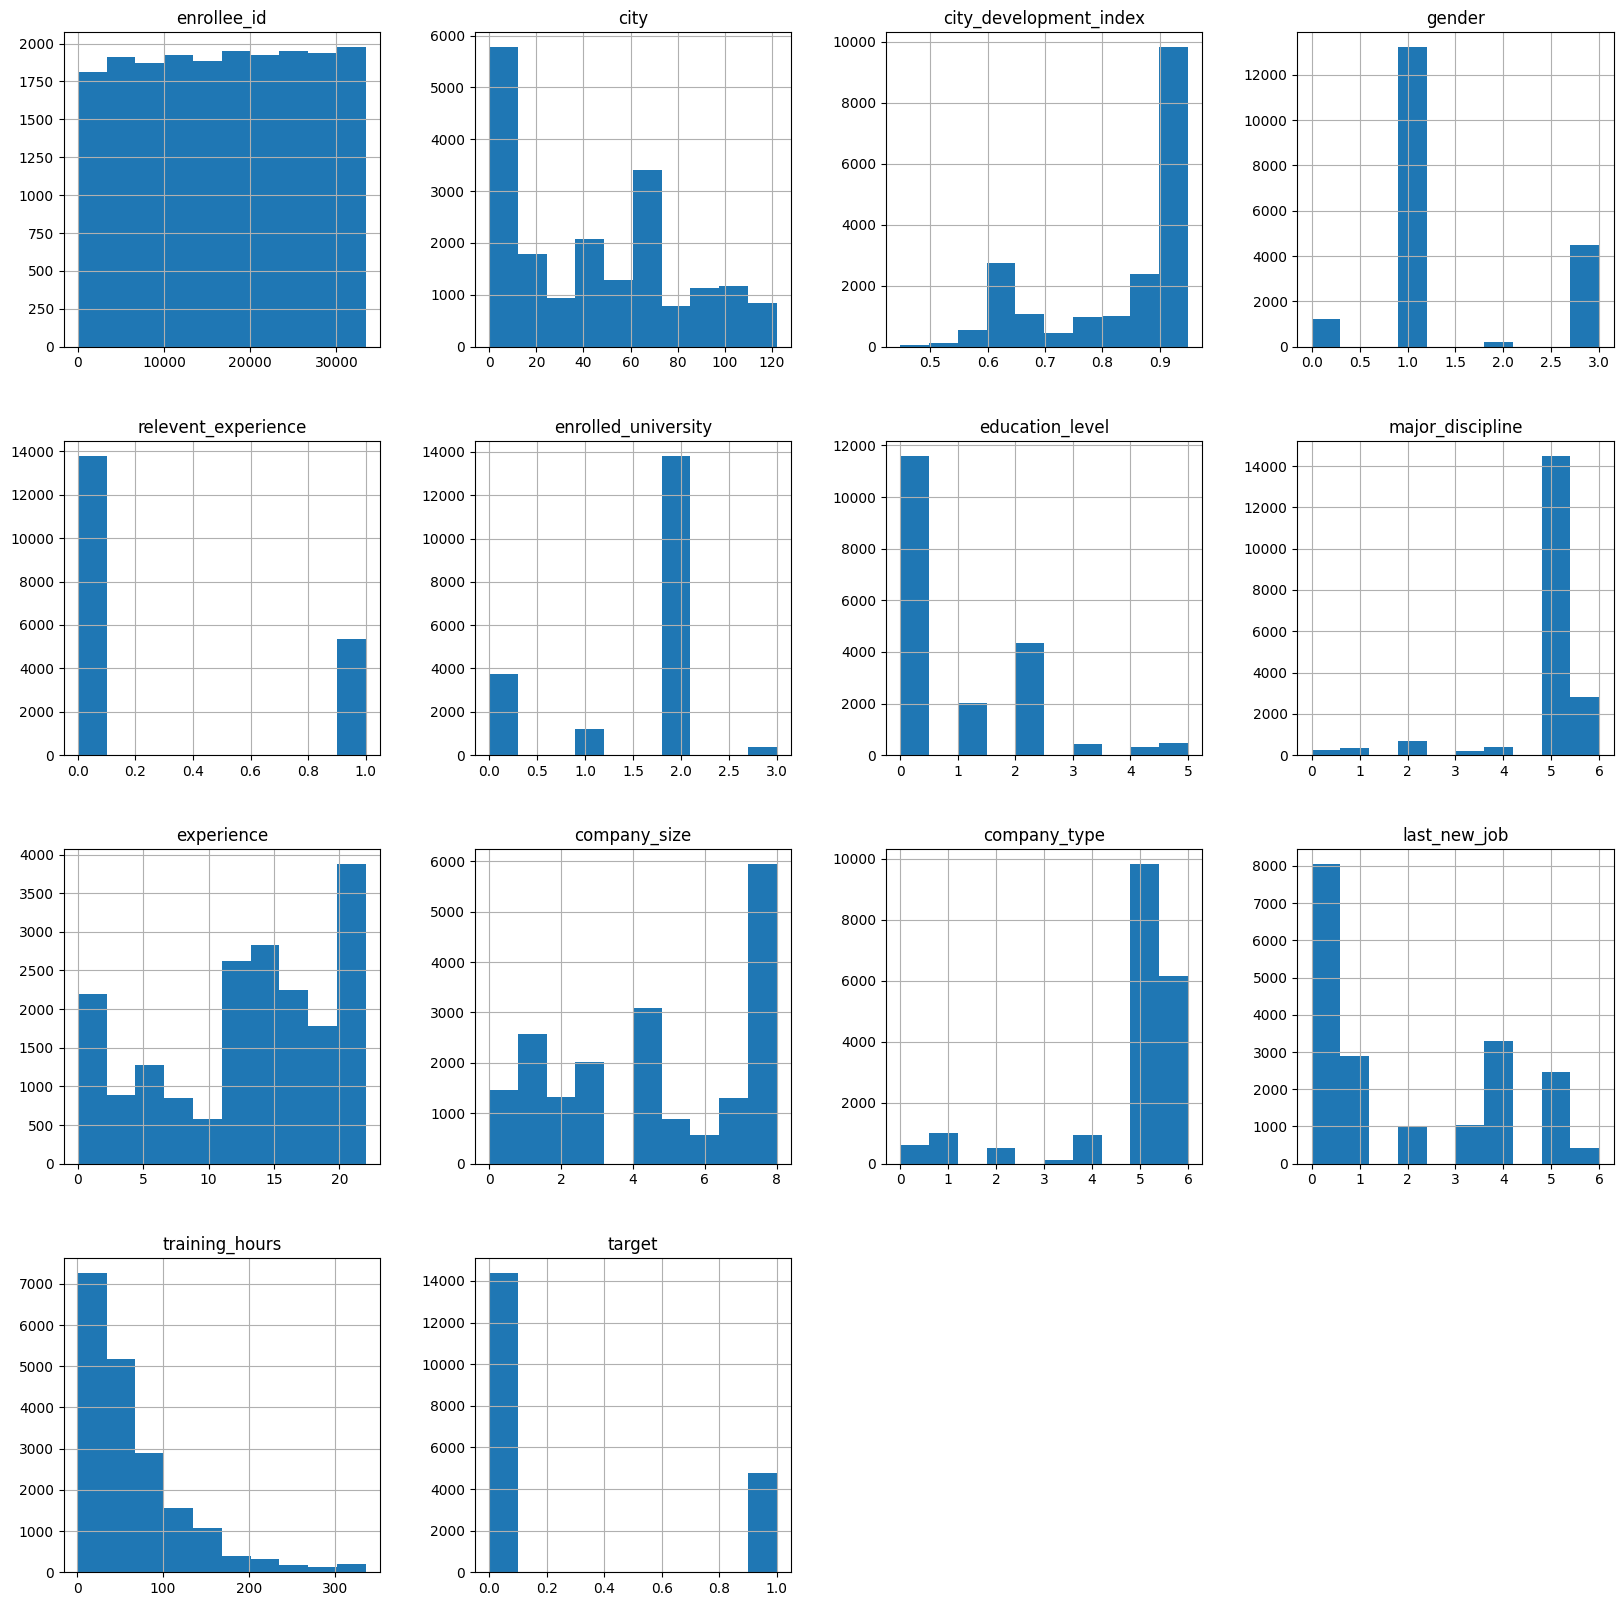

In [41]:
# BAISC HIST
data.iloc[:,0:16].hist(figsize=(20,20))
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_3016\2403706125.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(data.major_discipline[data.target == 0] ,
C:\Users\PC\AppData\Local\Temp\ipykernel_3016\2403706125.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(data.loc[(data['target'] == 1),'major_discipline'] ,


([<matplotlib.axis.XTick at 0x2264aea17e0>,
 [Text(0, 0, 'No Major'),
  Text(1, 0, 'Arts'),
  Text(2, 0, 'Business Degree'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Humanities'),
  Text(5, 0, 'STEM')])

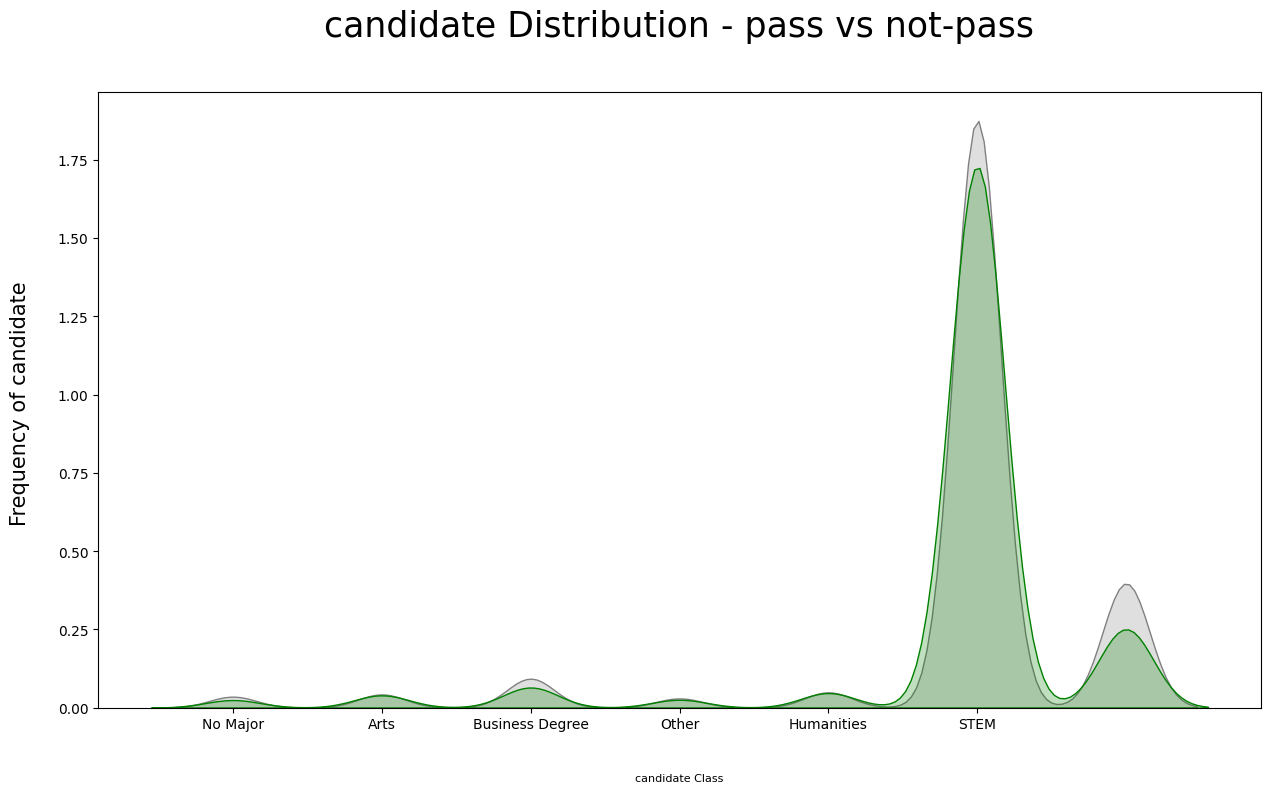

In [42]:

# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
## I have included to different ways to code a plot below, choose the one that suites you. 
ax=sns.kdeplot(data.major_discipline[data.target == 0] , 
               color='gray',
               shade=True,
               label='not')
ax=sns.kdeplot(data.loc[(data['target'] == 1),'major_discipline'] , 
               color='g',
               shade=True, 
               label='yes', 
              )
plt.title('candidate Distribution - pass vs not-pass', fontsize = 25, pad = 40)
plt.ylabel("Frequency of candidate ", fontsize = 15, labelpad = 20)
plt.xlabel("candidate Class", fontsize = 8,labelpad =30)
## Converting xticks into words for better understanding
labels = ['No Major', 'Arts', 'Business Degree','Other','Humanities','STEM']
plt.xticks(sorted(data.education_level.unique()), labels)

C:\Users\PC\AppData\Local\Temp\ipykernel_3016\1208796056.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(data.education_level[data.target == 0] ,
C:\Users\PC\AppData\Local\Temp\ipykernel_3016\1208796056.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(data.loc[(data['target'] == 1),'education_level'] ,


([<matplotlib.axis.XTick at 0x2264af38c40>,
 [Text(0, 0, 'Graduate'),
  Text(1, 0, 'Masters'),
  Text(2, 0, 'High School'),
  Text(3, 0, 'Phd'),
  Text(4, 0, 'Primary School'),
  Text(5, 0, 'null')])

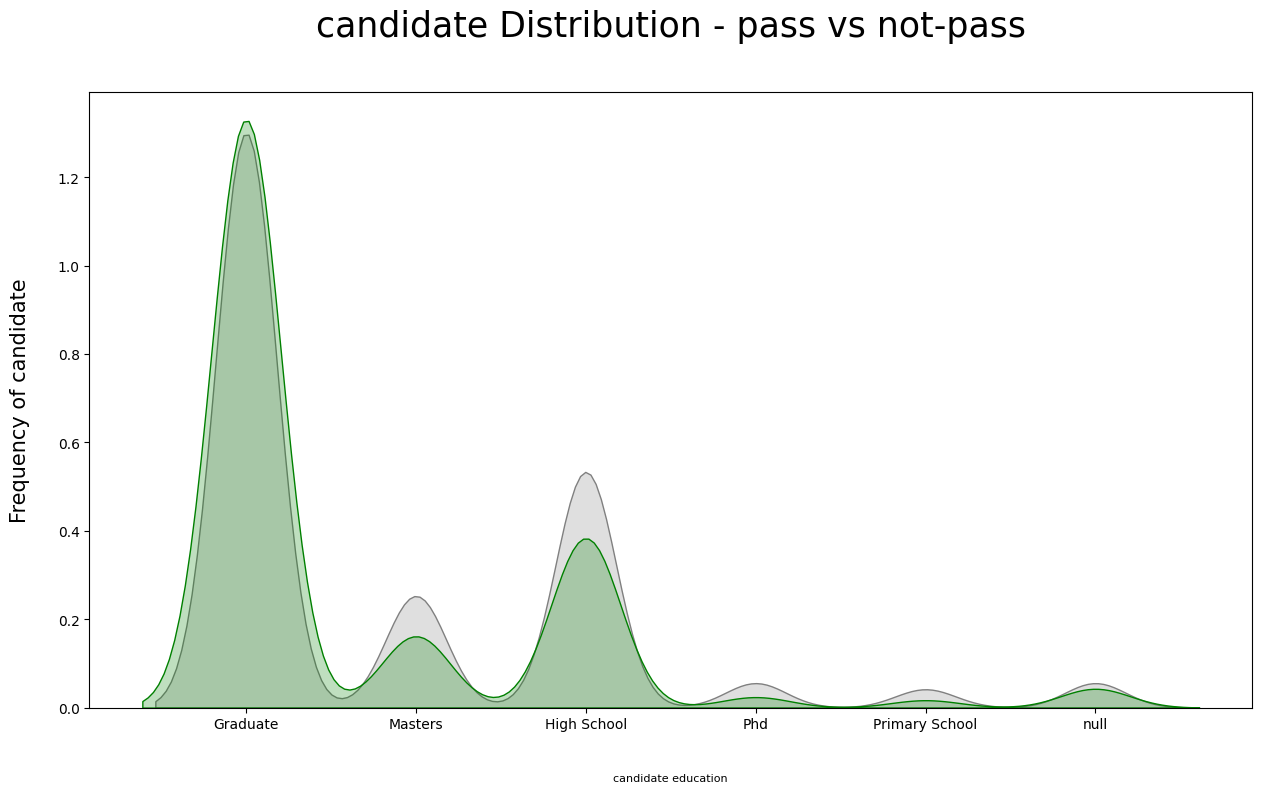

In [43]:

# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
## I have included to different ways to code a plot below, choose the one that suites you. 
ax=sns.kdeplot(data.education_level[data.target == 0] , 
               color='gray',
               shade=True,
               label='not')
ax=sns.kdeplot(data.loc[(data['target'] == 1),'education_level'] , 
               color='g',
               shade=True, 
               label='yes', 
              )
plt.title('candidate Distribution - pass vs not-pass', fontsize = 25, pad = 40)
plt.ylabel("Frequency of candidate", fontsize = 15, labelpad = 20)
plt.xlabel("candidate education", fontsize = 8,labelpad =30)
## Converting xticks into words for better understanding
labels = ['Graduate', 'Masters', 'High School','Phd','Primary School','null']
plt.xticks(sorted(data.education_level.unique()), labels)

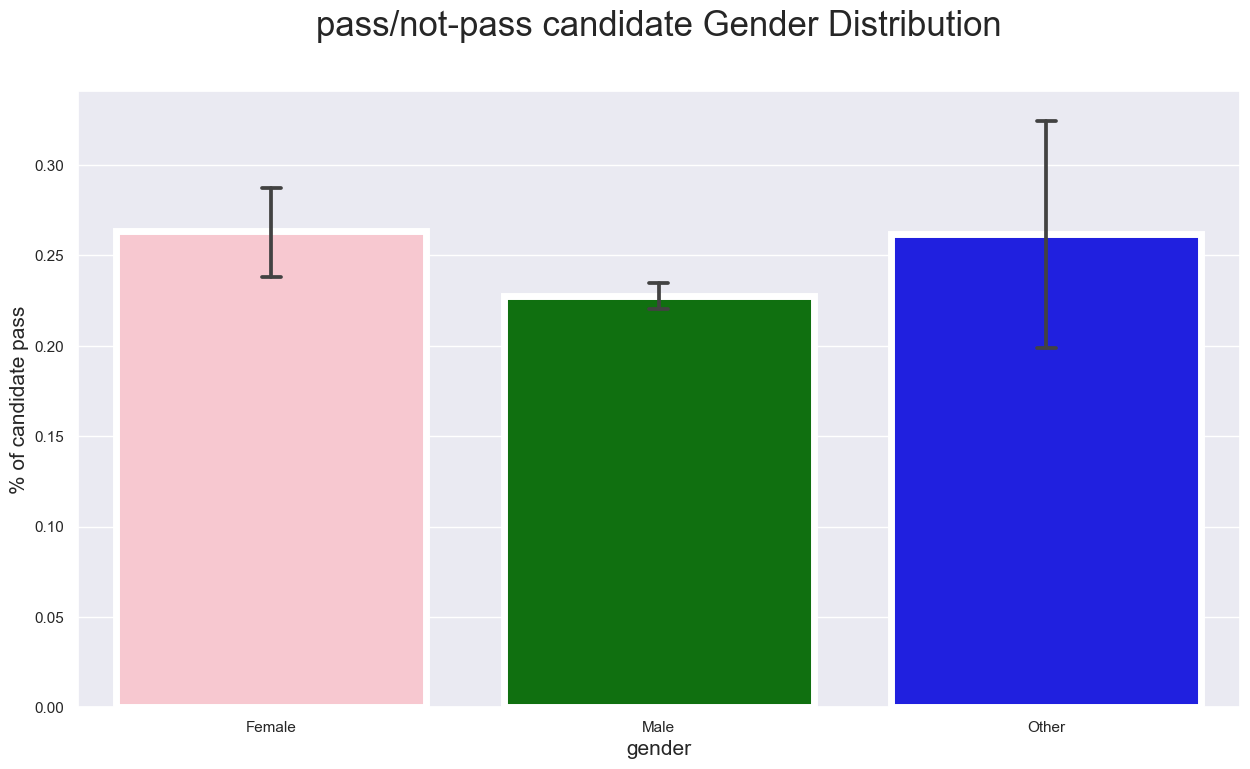

In [44]:
import seaborn as sns
pal = {'Male':"green", 'Female':"Pink",'Other':'blue'}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "gender", 
                 y = "target", 
                 data=train, 
                 palette = pal,
                 linewidth=5,
                 order = ['Female','Male','Other'],
                 capsize = .05,

                )

plt.title("pass/not-pass candidate Gender Distribution", fontsize = 25,loc = 'center', pad = 40)
plt.ylabel("% of candidate pass", fontsize = 15, )
plt.xlabel("gender",fontsize = 15);

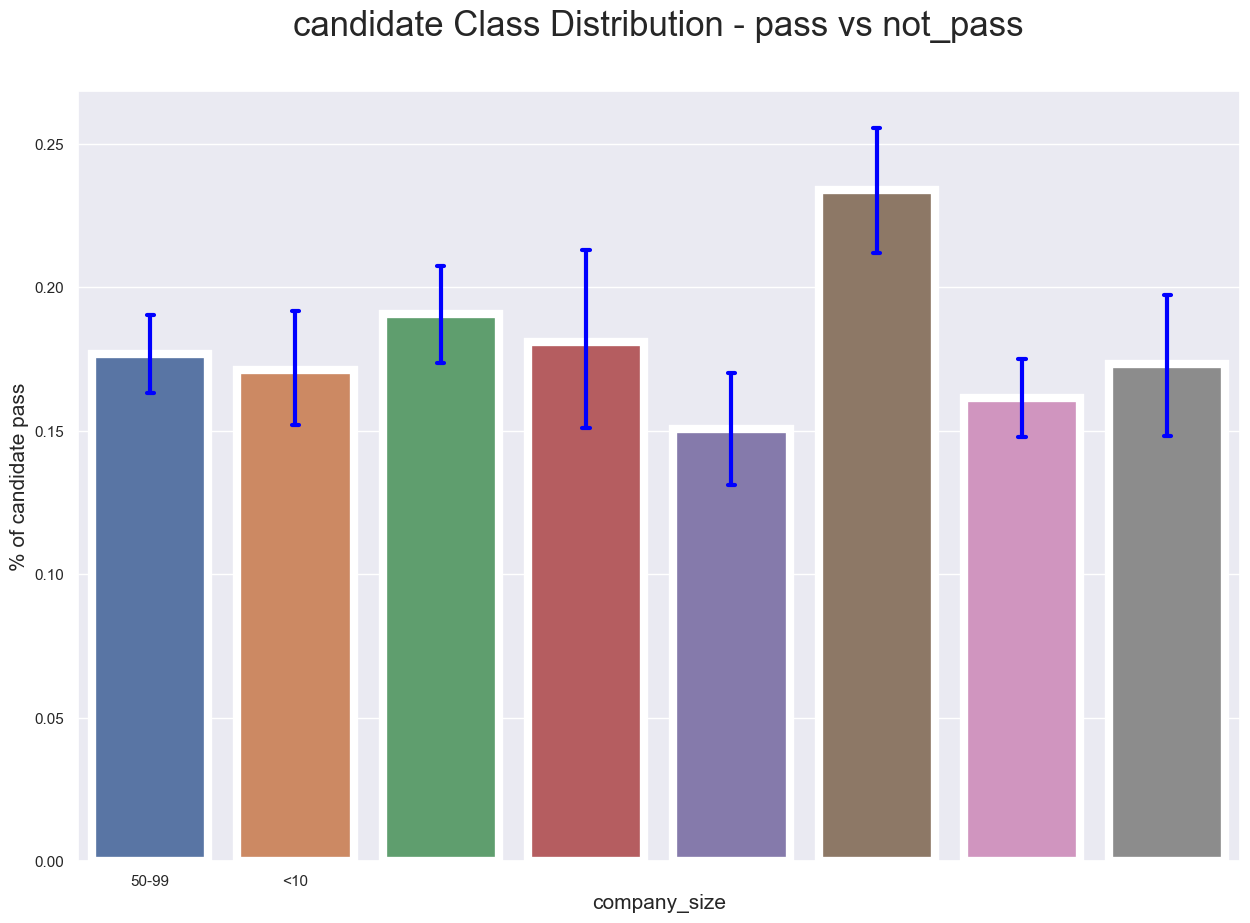

In [45]:
plt.subplots(figsize = (15,10))
sns.barplot(x = "company_size", 
            y = "target", 
            data=df, 
            linewidth=6,
            capsize = .05,
            errcolor='blue',
            errwidth = 3
            

           )
plt.title("candidate Class Distribution - pass vs not_pass", fontsize = 25, pad=40)
plt.xlabel("company_size", fontsize = 15);
plt.ylabel("% of candidate pass", fontsize = 15);
names = ['50-99', '0']
#val = sorted(train.company_size.unique())
val = [0,1] ## this is just a temporary trick to get the label right. 
plt.xticks(val );

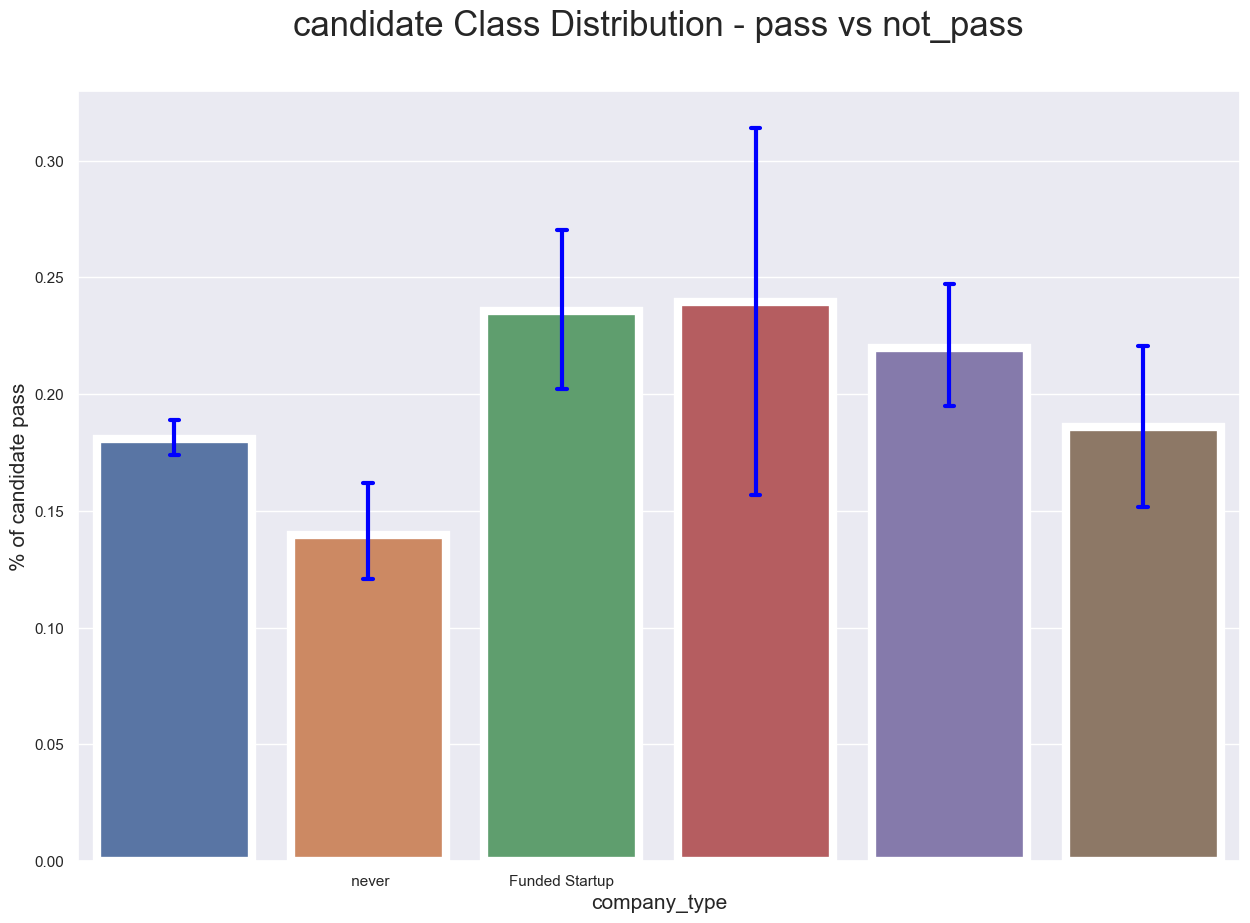

In [46]:
plt.subplots(figsize = (15,10))
sns.barplot(x = "company_type", 
            y = "target", 
            data=df, 
            linewidth=6,
            capsize = .05,
            errcolor='blue',
            errwidth = 3
            

           )
plt.title("candidate Class Distribution - pass vs not_pass", fontsize = 25, pad=40)
plt.xlabel("company_type", fontsize = 15);
plt.ylabel("% of candidate pass", fontsize = 15);
names = ['', ' never','Funded Startup']
#val = sorted(train.company_type.unique())
val = [0,1,2] ## this is just a temporary trick to get the label right. 
plt.xticks(val, names);


In [47]:
from pathlib import Path
filepath =Path('dfknn.csv')
filepath.parent.mkdir(parents=True, exist_ok=True) 
dfknn.to_csv(filepath)  



In [48]:
dataa = train['gender'].value_counts()
datab = train['target'].value_counts()

datac = pd.concat([dataa,datab],axis =1)
datac

,gender,target
0.0,NaN,14381.0
1.0,NaN,4777.0
Female,1238.0,NaN
Male,13221.0,NaN
Other,191.0,NaN


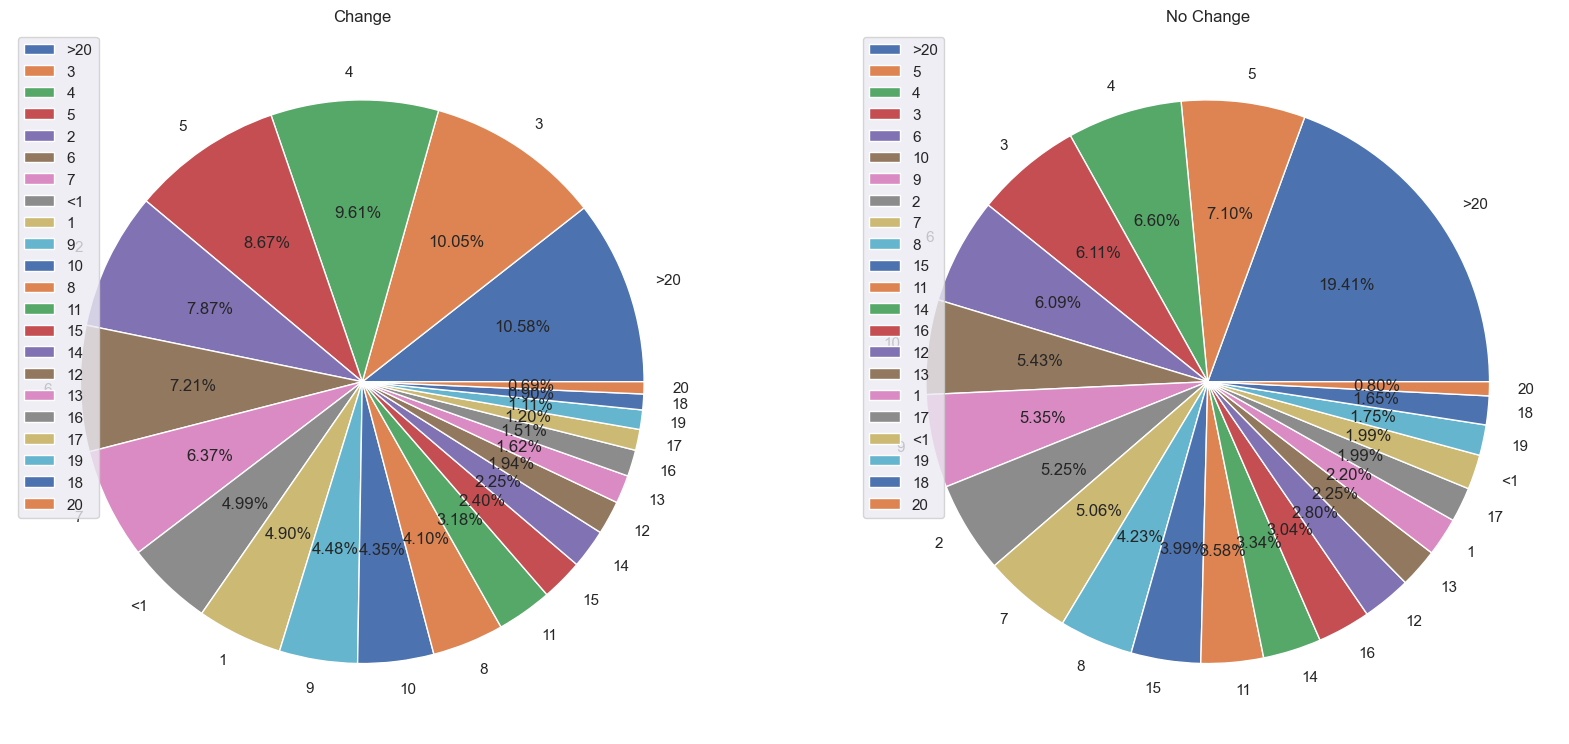

In [49]:
change = train[train.target == 1].experience.value_counts()
no_change = train[train.target == 0].experience.value_counts()
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.pie(change,autopct='%1.2f%%',labels=change.index)
plt.legend()
plt.title('Change')
plt.subplot(1,2,2)
plt.pie(no_change,autopct='%1.2f%%',labels=no_change.index)
plt.legend()
plt.title('No Change')
plt.show()

# outlier values

In [50]:
datad = data.copy()
from sklearn.neighbors import LocalOutlierFactor
lof= LocalOutlierFactor()
lof.fit_predict(datad)

array([1, 1, 1, ..., 1, 1, 1])

In [51]:
score = lof.negative_outlier_factor_
scsort = np.sort(score)
print(scsort[0:30])
# index 0 may have outlier -->-1.81626813

[-2.22795329 -2.22218219 -2.2076851  -2.20744059 -2.16327984 -2.14272401
 -2.13866198 -2.08192279 -2.06537944 -2.06434315 -2.05758158 -2.05540709
 -2.04375392 -2.03168142 -2.00624784 -1.99800662 -1.9819063  -1.97971661
 -1.97771959 -1.96703682 -1.96554995 -1.94051322 -1.93956677 -1.93018351
 -1.92999213 -1.91958074 -1.90486738 -1.89935625 -1.89642865 -1.89642584]


In [52]:
point = score[0]
print(f"Outlier point -->{point} ")
print("---"*20)
print("Outlier Row-->\n",datad[score == point])

Outlier point -->-0.9850930314165653 
------------------------------------------------------------
Outlier Row-->
    enrollee_id  city  city_development_index  gender  relevent_experience  \
0         8949     5                    0.92       1                    0   

   enrolled_university  education_level  major_discipline  experience  \
0                    2                0                 5          21   

   company_size  company_type  last_new_job  training_hours  target  
0             8             6             0              36     1.0  


In [53]:
totaloutlier = datad < point
print(datad[totaloutlier].any())

enrollee_id               False
city                      False
city_development_index    False
gender                    False
relevent_experience       False
enrolled_university       False
education_level           False
major_discipline          False
experience                False
company_size              False
company_type              False
last_new_job              False
training_hours            False
target                    False
dtype: bool


In [54]:
mldata =datad> point
print(data[mldata])
mld = data[mldata]

       enrollee_id  city  city_development_index  gender  relevent_experience  \
0             8949     5                   0.920       1                    0   
1            29725    77                   0.776       1                    1   
2            11561    64                   0.624       3                    1   
3            33241    14                   0.789       3                    1   
4              666    50                   0.767       1                    0   
...            ...   ...                     ...     ...                  ...   
19153         7386    55                   0.878       1                    1   
19154        31398     5                   0.920       1                    0   
19155        24576     5                   0.920       1                    0   
19156         5756    94                   0.802       1                    0   
19157        23834    95                   0.855       3                    1   

       enrolled_university 

# PRIDICTION MODELS

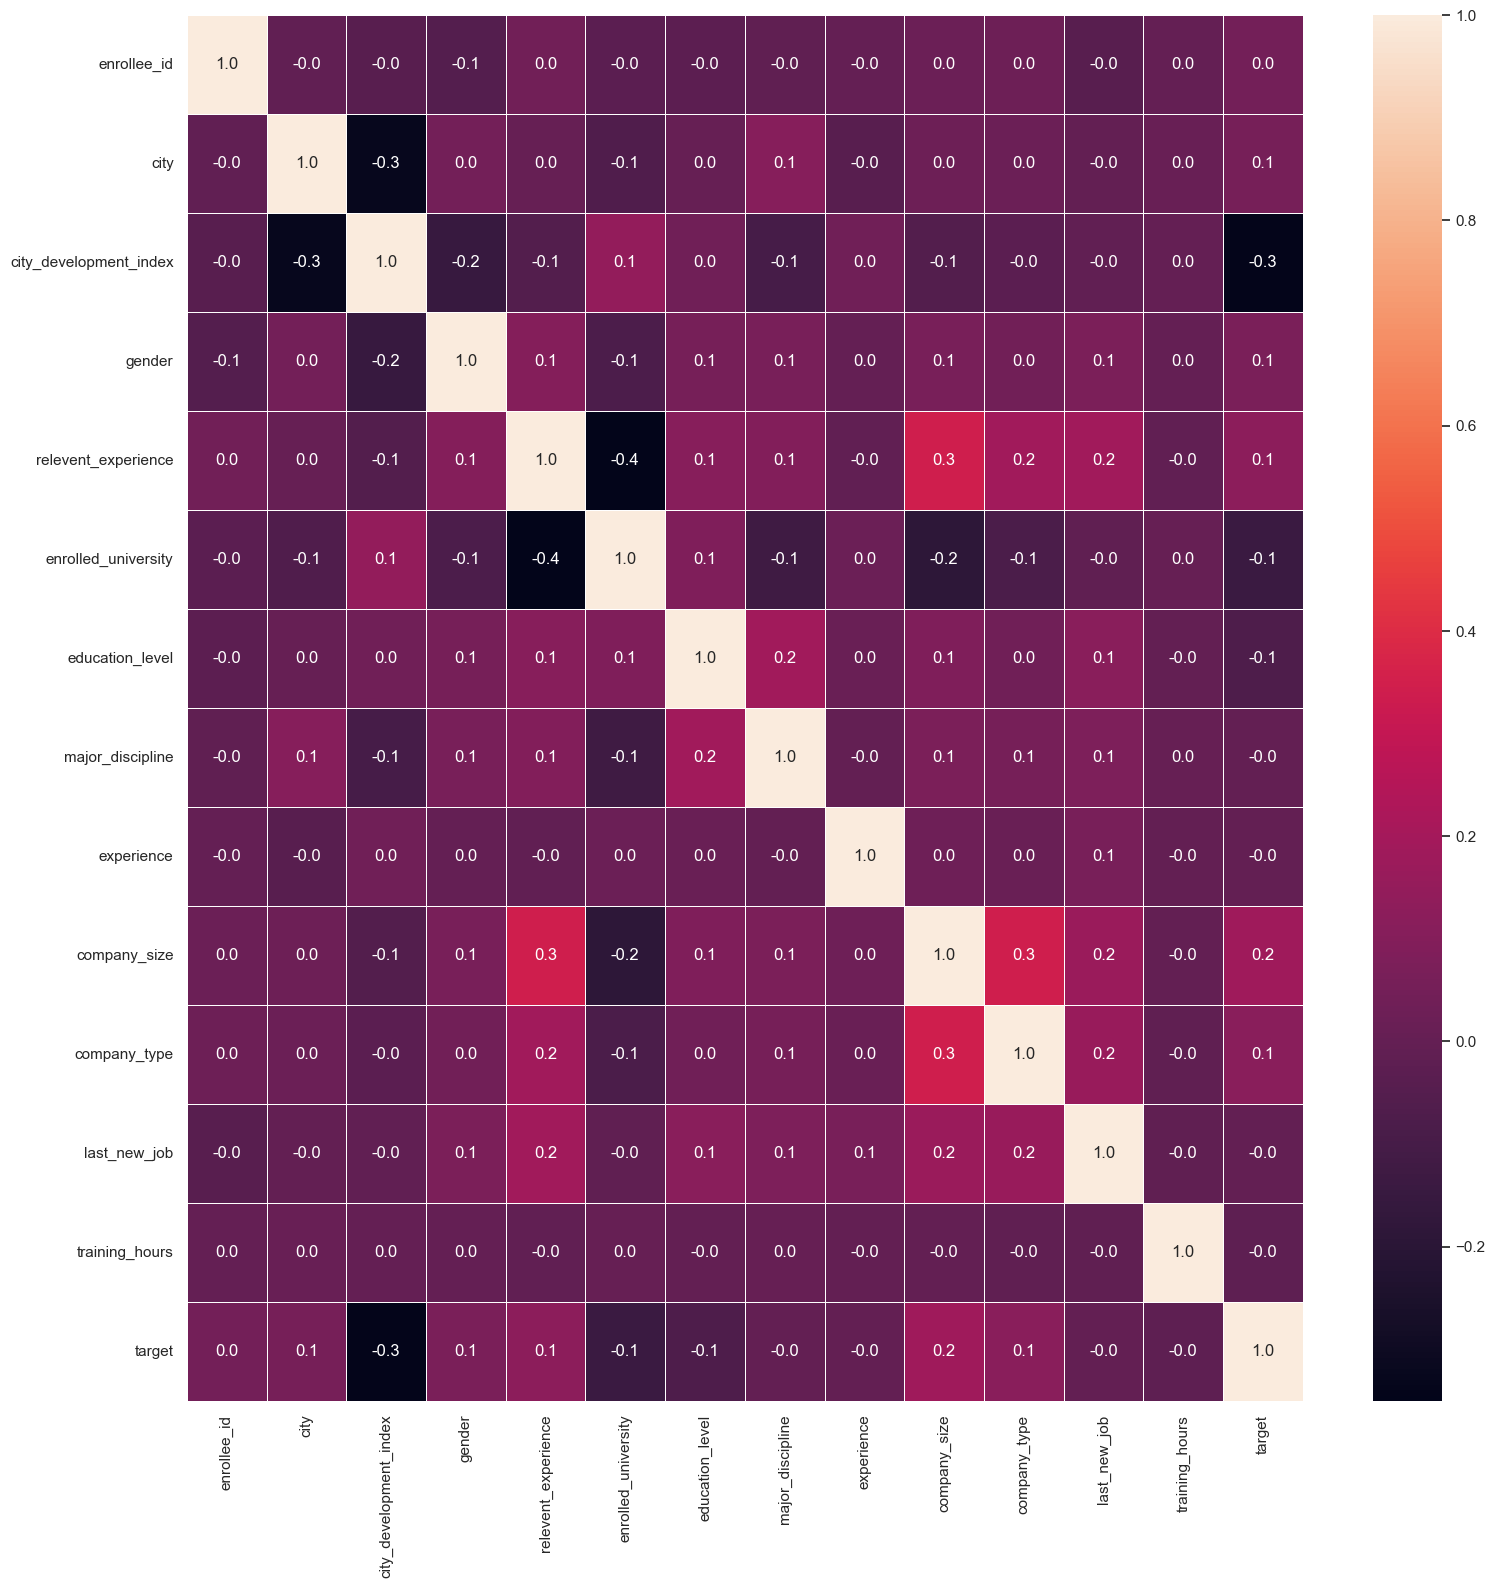

In [55]:
import seaborn as sns
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(mld.corr(),annot =True,linewidths = 0.5,fmt = '.1f',ax=ax)
plt.show()

In [130]:
mld.drop(columns=['enrollee_id'],inplace = True)

In [131]:

ml = mld.copy()
X = ml.dropna().drop(columns=['target']).values
y = ml.dropna()['target'].values

In [132]:
ml

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,5,0.920,1,0,2,0,5,21,8,6,0,36,1.0
1,77,0.776,1,1,2,0,5,6,4,5,4,47,0.0
2,64,0.624,3,1,0,0,5,15,8,6,5,83,0.0
3,14,0.789,3,1,3,0,1,20,8,5,5,52,1.0
4,50,0.767,1,0,2,2,5,21,4,1,3,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,55,0.878,1,1,2,0,2,5,8,6,0,42,1.0
19154,5,0.920,1,0,2,0,5,5,8,6,3,52,1.0
19155,5,0.920,1,0,2,0,5,21,4,5,3,44,0.0
19156,94,0.802,1,0,2,1,6,20,5,5,1,97,0.0


In [133]:
print("Before Undersampling, counts of label '1': {}".format(sum(y == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y == 0)))
  
# apply near miss
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE 
nr =SMOTE(random_state = 402)
  
x_train, y_train = nr.fit_resample(X, y.ravel())
  
print('After Undersampling, the shape of train_X: {}'.format(X.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y.shape))

print("After Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train == 0)))

Before Undersampling, counts of label '1': 4777
Before Undersampling, counts of label '0': 14381 

After Undersampling, the shape of train_X: (19158, 12)
After Undersampling, the shape of train_y: (19158,) 

After Undersampling, counts of label '1': 14381
After Undersampling, counts of label '0': 14381


In [134]:
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2 ,random_state = 42)


In [135]:
import statsmodels.api as sm 
import missingno as msno 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import scale
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.preprocessing import scale
from sklearn.model_selection import ShuffleSplit,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression 
from sklearn.cross_decomposition import PLSRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import  ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
  



C:\Users\PC\AppData\Local\Temp\ipykernel_3016\186914032.py:8: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


https://www.kaggle.com/code/nkitgupta/who-will-leave-a-job/notebook#Reference-

i am very thankful for this man 

In [136]:

clf = XGBClassifier()

clf.fit(X_train, y_train)

y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_val)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(y_train, y_train_pred_pos)
auc_test = roc_auc_score(y_val, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

Train AUC Score 0.9752355774141858
Test AUC Score 0.9337666413834146


In [137]:
def plot_auc_curve(fpr, tpr, auc):
    plt.figure(figsize = (16,6))
    plt.plot(fpr,tpr,'b+',linestyle = '-')
    plt.fill_between(fpr, tpr, alpha = 0.5)
    plt.ylabel('True Postive Rate')
    plt.xlabel('False Postive Rate')
    plt.title(f'ROC Curve Having AUC = {auc}')

fpr, tpr, _ = roc_curve(y_val, y_val_pred_pos)    

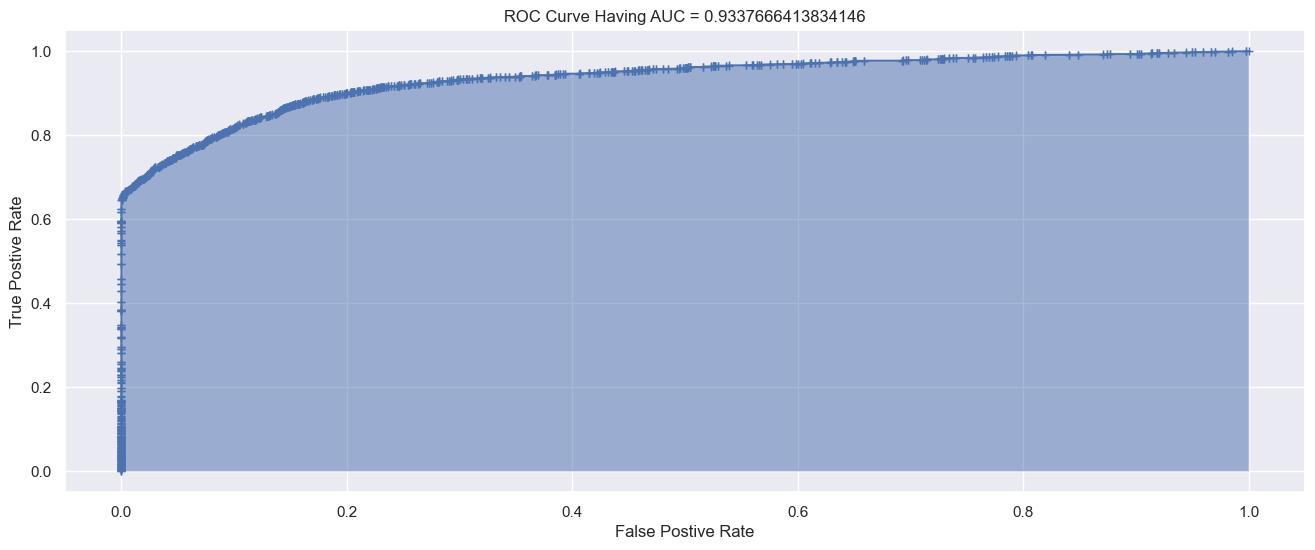

In [138]:
plot_auc_curve(fpr, tpr, auc_test)

In [139]:
# funtion to plot learning curves
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, log_loss, plot_roc_curve, auc, precision_recall_curve

def plot_learning_cuve(model, X, Y):
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 11)
    train_loss, test_loss = [], []
    
    for m in range(200,len(x_train),200):
        
        model.fit(x_train[:m,:], y_train[:m])
        y_train_prob_pred = model.predict_proba(x_train[:m,:])
        train_loss.append(log_loss(y_train[:m], y_train_prob_pred))
        
        y_test_prob_pred = model.predict_proba(x_test)
        test_loss.append(log_loss(y_test, y_test_prob_pred))
        
    plt.figure(figsize = (15,8))
    plt.plot(train_loss, 'r-+', label = 'Training Loss')
    plt.plot(test_loss, 'b-', label = 'Test Loss')
    plt.xlabel('Number Of Batches')
    plt.ylabel('Log-Loss')
    plt.legend(loc = 'best')



    plt.show()
        

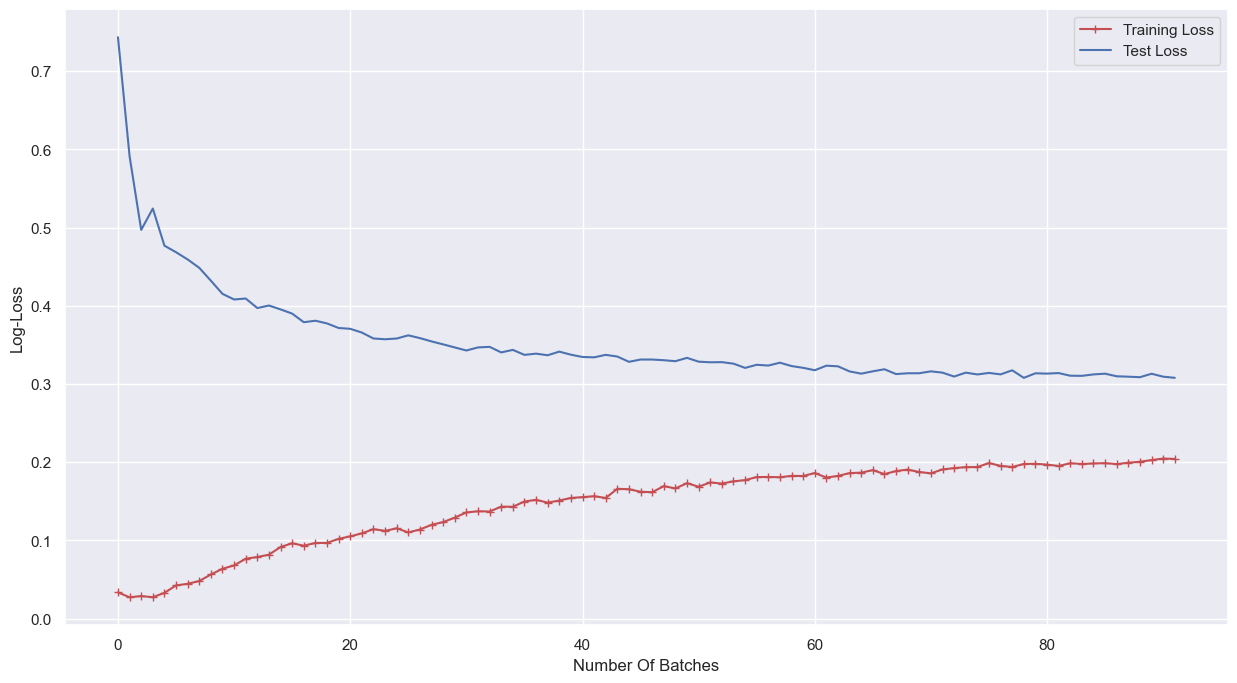

In [140]:
plot_learning_cuve(XGBClassifier(), X_train, y_train)

#X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2 ,random_state = 42)


In [141]:
ml.columns

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

In [143]:
h =  [ 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours']
from sklearn.feature_selection import f_classif
f = pd.Series(f_classif(X_val, y_val)[0], index = h)
fimpo = f / f.sum() * 100
fimpo

city                       0.892922
city_development_index    49.362871
gender                     0.632530
relevent_experience        8.424205
enrolled_university        9.362481
education_level            6.064899
major_discipline           0.001895
experience                 0.001324
company_size              16.849399
company_type               8.042185
last_new_job               0.294224
training_hours             0.071065
dtype: float64

In [170]:
testdata= pd.read_csv("aug_test.csv")
testdf =  testdata.copy()

from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

cat_cols = [col for col in testdata.columns if testdata[col].dtype == 'object']

for col in cat_cols:
    testdf[col] = lb.fit_transform(testdf[col])



from sklearn.impute import KNNImputer

def knn_imputation(df):
    missing_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
    non_missing_cols = [col for col in df.columns if df[col].isnull().sum() == 0]

    for col in missing_cols:

        # Defining a new bagging model for each attribute  
        model = KNNImputer(n_neighbors = 3)

        col_missing = df[df[col].isnull()]
        temp = df.drop(df[df[col].isnull()].index, axis = 0)

        # print(temp.columns)
        # X = temp.drop(col, axis = 1)
        X = temp.loc[:, non_missing_cols]
        y = temp[col]

        model.fit(X, y)

        y_pred = model.predict(col_missing[non_missing_cols])
        # col_missing[col] = y_pred

        df.loc[col_missing.index, col] = y_pred
        
    return df
    
testknn = knn_imputation(testdf)
testml = testknn.copy()

testml.drop(columns=['enrollee_id'],inplace = True)


test_pred = clf.predict_proba(testml)
final = pd.DataFrame(test_pred)



In [178]:
succ = final[final[1] > 0.8]
succ

,0,1
23,0.157697,0.842303
44,0.195681,0.804319
101,0.113057,0.886943
139,0.128525,0.871475
151,0.197784,0.802216
176,0.177094,0.822906
190,0.157264,0.842736
218,0.149306,0.850694
300,0.198440,0.801560
302,0.173017,0.826983


In [181]:
conc_data_col = pd.concat([testdata,final],axis =1) # axis = 1 : adds dataframes in column
done = conc_data_col[conc_data_col[1] > 0.8]
done

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,0,1
23,5058,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,1,NaN,NaN,1,81,0.157697,0.842303
44,18133,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,STEM,1,NaN,NaN,1,23,0.195681,0.804319
101,26180,city_139,0.487,Male,No relevent experience,Full time course,Graduate,STEM,1,10/49,Pvt Ltd,never,64,0.113057,0.886943
139,15367,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,<1,NaN,NaN,1,24,0.128525,0.871475
151,27117,city_90,0.698,Male,No relevent experience,Full time course,Graduate,STEM,<1,NaN,NaN,never,8,0.197784,0.802216
176,5967,city_21,0.624,Male,Has relevent experience,no_enrollment,Masters,STEM,9,10/49,Pvt Ltd,>4,101,0.177094,0.822906
190,22999,city_21,0.624,Female,Has relevent experience,no_enrollment,Graduate,STEM,<1,100-500,Pvt Ltd,1,9,0.157264,0.842736
218,19504,city_21,0.624,NaN,Has relevent experience,no_enrollment,Graduate,STEM,4,10/49,Pvt Ltd,1,18,0.149306,0.850694
300,8485,city_40,0.776,Male,No relevent experience,Full time course,Graduate,STEM,8,NaN,NaN,2,31,0.198440,0.801560
302,28370,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,112,0.173017,0.826983
